In [2]:
import os
import numpy as np
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.applications import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.layers import GlobalAveragePooling2D, Dense
from keras.applications.efficientnet import EfficientNetB0, preprocess_input

# Downloading the dataset

In [3]:
os.environ["KAGGLE_USERNAME"]="arunraghav"
os.environ["KAGGLE_KEY"]="7296577ea3df743997bf9f2324653c4c"

In [4]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
License(s): copyright-authors


In [5]:
!unzip covid19-radiography-database

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/No

In [6]:
# import shutil
# dir_path = "COVID-19_Radiography_Dataset"

# # Use the os module to delete the directory
# if os.path.exists(dir_path):
#     shutil.rmtree(dir_path)

# Unmasked Images

## Creating dataset

In [7]:
covid_images = "COVID-19_Radiography_Dataset/COVID/images/"
covid_path= "COVID-19_Radiography_Dataset/COVID/"
normal_images = "COVID-19_Radiography_Dataset/Normal/images/"
normal_path= "COVID-19_Radiography_Dataset/Normal/"

In [8]:
covid_mask = "COVID-19_Radiography_Dataset/COVID/masks/"
covid_masked_images="COVID-19_Radiography_Dataset/COVID/covid_masked_images/"
normal_mask = "COVID-19_Radiography_Dataset/Normal/masks/"
normal_masked_images="COVID-19_Radiography_Dataset/Normal/normal_masked_images/"

In [9]:
original_files = os.listdir(covid_images)
mask_files = os.listdir(covid_mask)
valid_files = []
for filename in original_files:
    if filename in mask_files:
        valid_files.append(filename)

In [10]:
if not os.path.exists(covid_path + "covid_masked_images"):
    os.mkdir(covid_path + "covid_masked_images")

In [11]:
# Loop through images in COVID original directory
for filename in valid_files:
    # Check if file is an image
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load original image and corresponding mask
        original_img = cv2.imread(covid_images + filename)
        mask_img = cv2.imread(covid_mask + filename)

        # Resize mask image to match dimensions of original image
        mask_img = cv2.resize(mask_img, (original_img.shape[1], original_img.shape[0]))

        # Convert mask to grayscale
        mask_gray = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)

        # Apply mask to original image
        masked_img = cv2.bitwise_and(original_img, original_img, mask=mask_gray)

        # Save the masked image in the new directory
        cv2.imwrite(covid_path + "covid_masked_images/" + filename, masked_img)

In [12]:
if not os.path.exists(normal_path + "normal_masked_images"):
    os.mkdir(normal_path + "normal_masked_images")

In [13]:
original_files = os.listdir(normal_images)
mask_files = os.listdir(normal_mask)
valid_files = []
for filename in original_files:
    if filename in mask_files:
        valid_files.append(filename)

In [14]:
# Loop through images in COVID original directory
for filename in valid_files:
    # Check if file is an image
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load original image and corresponding mask
        original_img = cv2.imread(normal_images + filename)
        mask_img = cv2.imread(normal_mask + filename)

        # Resize mask image to match dimensions of original image
        mask_img = cv2.resize(mask_img, (original_img.shape[1], original_img.shape[0]))

        # Convert mask to grayscale
        mask_gray = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)

        # Apply mask to original image
        masked_img = cv2.bitwise_and(original_img, original_img, mask=mask_gray)

        # Save the masked image in the new directory
        cv2.imwrite(normal_path + "normal_masked_images/" + filename, masked_img)

In [15]:
new_original_dataset="COVID-19_Radiography_Dataset/"+ "Dataset"
new_covid="COVID-19_Radiography_Dataset/Dataset/"+ "covid"
new_non_covid="COVID-19_Radiography_Dataset/Dataset/"+ "non-covid"

In [16]:
import shutil

if not os.path.exists(new_original_dataset):
    os.mkdir(new_original_dataset)
if not os.path.exists(new_covid):
    os.mkdir(new_covid)
if not os.path.exists(new_non_covid):
    os.mkdir(new_non_covid)

old_path1 = covid_images
old_path2 = normal_images

new_path1 = new_covid
new_path2 = new_non_covid

shutil.move(old_path1, new_path1)
shutil.move(old_path2, new_path2)

'COVID-19_Radiography_Dataset/Dataset/non-covid/images'

In [17]:
folder_a_path = new_covid
folder_b_path = new_covid+"/images"
for file_name in os.listdir(folder_b_path):
    file_path = os.path.join(folder_b_path, file_name)
    shutil.move(file_path, folder_a_path)
shutil.rmtree(folder_b_path)

folder_a_path = new_non_covid
folder_b_path = folder_a_path+"/images"
for file_name in os.listdir(folder_b_path):
    file_path = os.path.join(folder_b_path, file_name)
    shutil.move(file_path, folder_a_path)
shutil.rmtree(folder_b_path)

In [18]:
folder_path = new_non_covid
num_to_delete = 6000
file_list = os.listdir(folder_path)
random.shuffle(file_list)

for i in range(num_to_delete):
    os.remove(os.path.join(folder_path, file_list[i]))

In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  new_original_dataset,
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=0,
  image_size=(224, 224))

Found 7808 files belonging to 2 classes.
Using 6247 files for training.


In [20]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  new_original_dataset,
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=0,
  image_size=(224, 224))

Found 7808 files belonging to 2 classes.
Using 1561 files for validation.


In [21]:
train_ds_rgb = tf.keras.utils.image_dataset_from_directory(
  new_original_dataset,
  validation_split=0.2,
  subset="training",
  color_mode='rgb',
  seed=0,
  image_size=(224, 224))

Found 7808 files belonging to 2 classes.
Using 6247 files for training.


In [22]:
val_ds_rgb = tf.keras.utils.image_dataset_from_directory(
  new_original_dataset,
  validation_split=0.2,
  subset="validation",
  color_mode='rgb',
  seed=0,
  image_size=(224, 224))

Found 7808 files belonging to 2 classes.
Using 1561 files for validation.


In [23]:
class_names = train_ds.class_names
class_names

['covid', 'non-covid']

In [24]:
dic={}

In [25]:
c=0
lst=list(os.listdir(new_covid))
for i in tqdm(range(len(list(os.listdir(new_covid))))):
  dic[c]=new_covid+"/"+lst[i]
  c+=1

100%|██████████| 3616/3616 [00:00<00:00, 1817883.65it/s]


In [26]:
dic_no_covid={}

In [27]:
c=0
lst=list(os.listdir(new_non_covid))
for i in tqdm(range(len(list(os.listdir(new_non_covid))))):
  dic_no_covid[c]=new_non_covid+"/"+lst[i]
  c+=1

100%|██████████| 4192/4192 [00:00<00:00, 1556388.63it/s]


## Visualising data

Text(0, 0.5, 'Data')

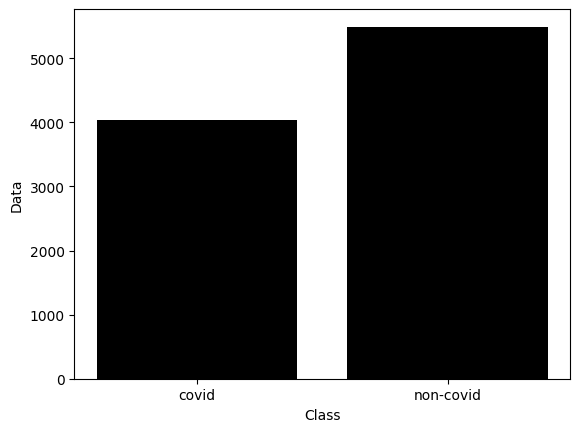

In [28]:
plt.bar(['covid','non-covid'], [4043,5492], color='black')
plt.xlabel('Class')
plt.ylabel('Data')

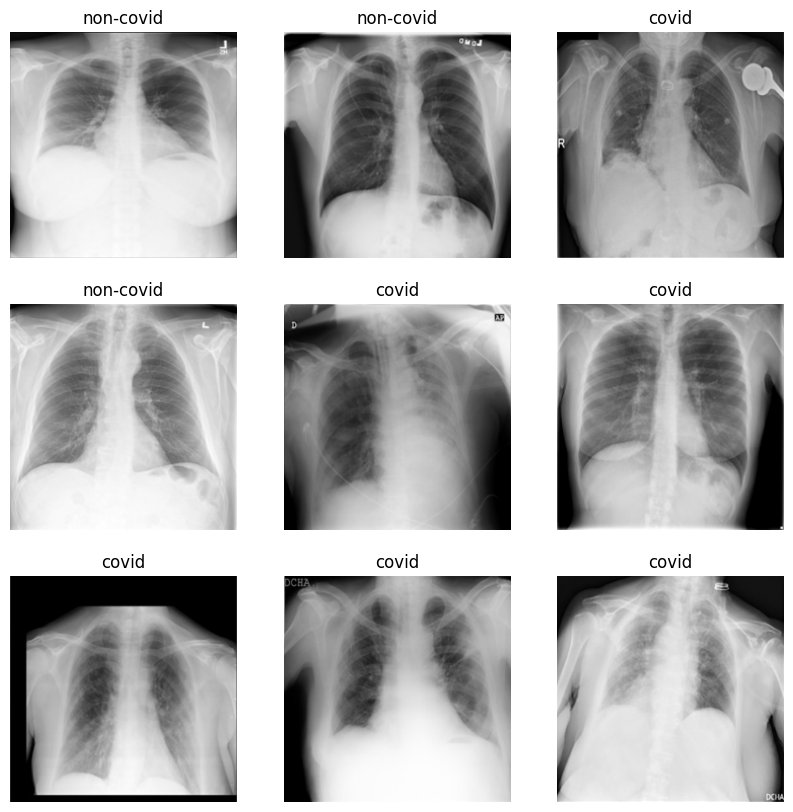

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().reshape(224,224).astype("uint8"), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [30]:
images = train_ds.take(1)
for image, label in images:
  print('Label:', label.numpy())
  print('Shape of the batch : {}'.format(image.numpy().shape))
  print('Dimension of Image : {}'.format(image.ndim))
  print('Image Data Type : {}'.format(image.dtype))

Label: [1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1]
Shape of the batch : (32, 224, 224, 1)
Dimension of Image : 4
Image Data Type : <dtype: 'float32'>


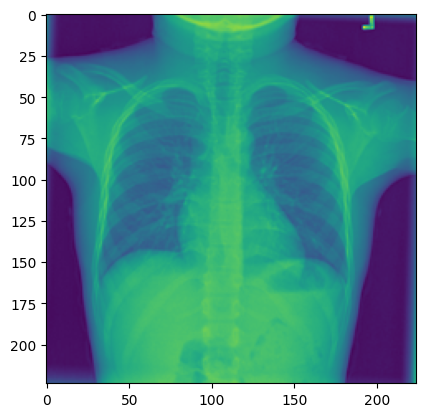

In [31]:
plt.imshow(image[0, :, :, 0])
plt.show()

## Preprocessing

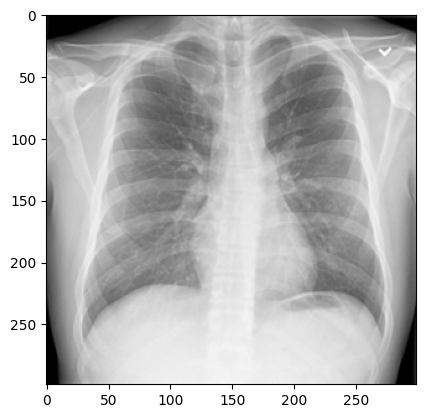

In [32]:
img_path = dic_no_covid[0]
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

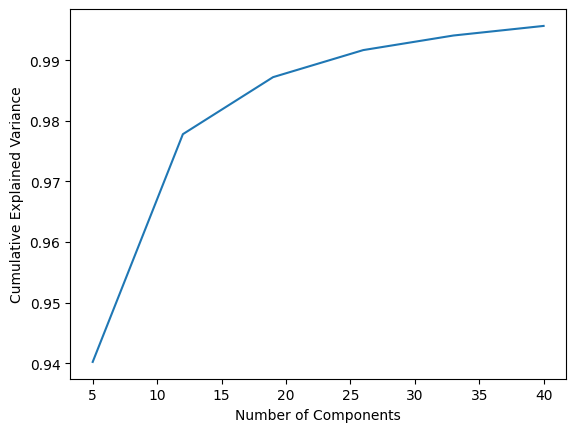

In [33]:
n_components_range = range(5, 41, 7)
cumulative_var = np.zeros(len(n_components_range))

for i, n_components in enumerate(n_components_range):
  pca = PCA(n_components=n_components)
  pca.fit(img)
  cumulative_var[i] = np.sum(pca.explained_variance_ratio_)

plt.plot(n_components_range, cumulative_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Choosing n_components = 20

In [34]:
dic_keys=list(dic.keys())
array_covid=np.zeros((1, 4481))          #(224*20)
for i in tqdm(range(len(dic_keys))):
  img = cv2.imread(dic[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, dsize=(224,224))
  pca = PCA(n_components=20)
  pca.fit(img)
  trans_img = pca.transform(img)
  array_covid = np.append(array_covid,np.concatenate((trans_img.flatten(),np.array([1])),axis=0).reshape(1, 4481),axis=0)

100%|██████████| 3616/3616 [05:55<00:00, 10.16it/s]


In [35]:
dic_no_covid_keys=list(dic_no_covid.keys())
array_no_covid=np.zeros((1, 4481))
for i in tqdm(range(len(dic_no_covid_keys))):
  img = cv2.imread(dic_no_covid[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, dsize=(224,224))
  pca = PCA(n_components=20)
  pca.fit(img)
  trans_img = pca.transform(img)
  array_no_covid=np.append(array_no_covid,np.concatenate((trans_img.flatten(),np.array([0])),axis=0).reshape(1, 4481),axis=0)

100%|██████████| 4192/4192 [07:11<00:00,  9.71it/s]


In [36]:
data_array=np.concatenate((array_covid,array_no_covid),axis=0)
data_array.shape

(7810, 4481)

## Splitting data

In [37]:
X = data_array.T[:-1].T
Y = data_array.T[-1].T

In [38]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, Y, train_size=0.7)

## Classification

### Simple models

**Kmeans**

In [39]:
model1 = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10)
model1.fit(X_train)
y_pred_kmeans = model1.predict(X_test)

In [40]:
acc_kmeans = accuracy_score(y_pred_kmeans,y_test)
print(f"Accuracy : {(acc_kmeans*100):.2f}%")
print()
print(classification_report(y_pred_kmeans,y_test))

Accuracy : 48.74%

              precision    recall  f1-score   support

           0       0.74      0.51      0.60      1791
           1       0.21      0.41      0.27       552

    accuracy                           0.49      2343
   macro avg       0.47      0.46      0.44      2343
weighted avg       0.61      0.49      0.53      2343



**Decision Tree**

In [41]:
model2 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3)
model2.fit(X_train, y_train)
y_pred_dtc = model2.predict(X_test)

In [42]:
acc_dtc = accuracy_score(y_pred_dtc, y_test)
print(f"Accuracy : {(acc_dtc*100):.2f}%")
print()
print(classification_report(y_pred_dtc, y_test))

Accuracy : 70.89%

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.72      1158
         1.0       0.73      0.68      0.70      1185

    accuracy                           0.71      2343
   macro avg       0.71      0.71      0.71      2343
weighted avg       0.71      0.71      0.71      2343



In [43]:
parameters = {'max_depth':[2, 4, 8], 'min_samples_leaf':[2, 4, 7]}
dtc = DecisionTreeClassifier()
model3 = GridSearchCV(dtc, parameters)
model3.fit(X_train, y_train)
y_pred_3 = model3.predict(X_test)

In [44]:
model3.best_params_

{'max_depth': 8, 'min_samples_leaf': 2}

In [45]:
acc_3 = accuracy_score(y_pred_3, y_test)
print(f"Accuracy : {(acc_3*100):.2f}%")
print()
print(classification_report(y_pred_3, y_test))

Accuracy : 70.55%

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71      1152
         1.0       0.73      0.67      0.70      1191

    accuracy                           0.71      2343
   macro avg       0.71      0.71      0.71      2343
weighted avg       0.71      0.71      0.71      2343



**Random Forest**

In [46]:
model4 = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_leaf=2, min_samples_split=3)
model4.fit(X_train,y_train)
y_pred_rfc = model4.predict(X_test)

In [47]:
acc_rfc = accuracy_score(y_pred_rfc, y_test)
print(f"Accuracy : {(acc_rfc*100):.2f}%")
print()
print(classification_report(y_pred_rfc, y_test))

Accuracy : 77.34%

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      1247
         1.0       0.76      0.76      0.76      1096

    accuracy                           0.77      2343
   macro avg       0.77      0.77      0.77      2343
weighted avg       0.77      0.77      0.77      2343



In [48]:
y_pred_rfc_proba = model4.predict_proba(X_test)

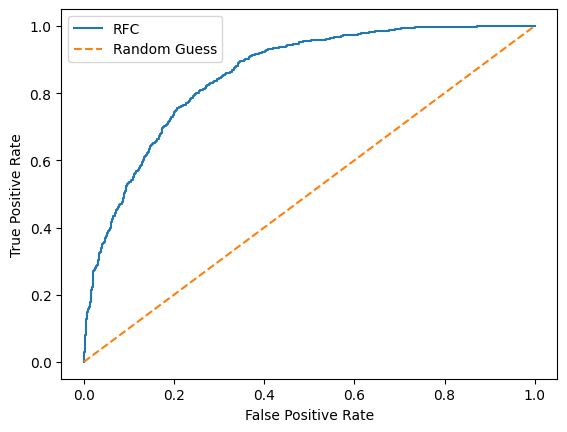

In [49]:
probs = y_pred_rfc_proba[:, 1]
fpr, tpr, _ = roc_curve(y_test, probs)

pyplot.plot(fpr, tpr, label='RFC')
pyplot.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
parameters = {'max_depth':[2, 4, 8], 'min_samples_leaf':[2, 4, 7]}
rfc = RandomForestClassifier()
model5 = GridSearchCV(rfc, parameters)
model5.fit(X_train, y_train)
y_pred_5 = model5.predict(X_test)

In [ ]:
model5.best_score_

In [ ]:
acc_5 = accuracy_score(y_pred_5, y_test)
print(f"Accuracy : {(acc_5*100):.2f}%")
print()
print(classification_report(y_pred_5, y_test))

**Logistic Regression**

In [ ]:
model6 = LogisticRegression()
model6.fit(X_train, y_train)
y_pred_lgr = model6.predict(X_test)

In [ ]:
acc_lgr = accuracy_score(y_pred_lgr, y_test)
print(f"Accuracy : {(acc_lgr*100):.2f}%")
print()
print(classification_report(y_pred_lgr, y_test))

**SVM**

In [ ]:
model7 = make_pipeline(StandardScaler(), SVC())
model7.fit(X_train, y_train)
y_pred_svm = model7.predict(X_test)

In [ ]:
acc_svm = accuracy_score(y_pred_svm, y_test)
print(f"Accuracy : {(acc_svm*100):.2f}%")
print()
print(classification_report(y_pred_svm, y_test))

**XGBoost**

In [ ]:
model8 = XGBClassifier(n_estimators=200)
model8.fit(X_train, y_train)
y_pred_xgb = model8.predict(X_test)

In [ ]:
acc_xgb = accuracy_score(y_pred_xgb, y_test)
print(f"Accuracy : {(acc_xgb*100):.2f}%")
print()
print(classification_report(y_pred_xgb, y_test))

**LightGBM**

In [ ]:
model9 = LGBMClassifier(n_estimators=200)
model9.fit(X_train, y_train)
y_pred_lgbm = model9.predict(X_test)

In [ ]:
acc_lgbm = accuracy_score(y_pred_lgbm,y_test)
print(f"Accuracy : {(acc_lgbm*100):.2f}%")
print()
print(classification_report(y_pred_lgbm,y_test))

In [ ]:
plt.plot(['KMeans', 'DTC', 'RFC', 'LR', 'SVM', 'XGBC','LGBMC'], [acc_kmeans, acc_dtc, acc_rfc, acc_lgr, acc_svm, acc_xgb, acc_lgbm], marker='o', color='black')
plt.xlabel('Model')
plt.ylabel('Accuracy')

### Deep Learning models

**Simple CNN**

In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 1)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10)

In [ ]:
from google.colab import files

model.save('my_model1.h5')

files.download('my_model1.h5')

In [ ]:
hist_cnn = pd.DataFrame(history.history)
hist_cnn['epoch'] = history.epoch
hist_cnn

In [ ]:
plt.plot(hist_cnn['accuracy'], marker='o', color='black')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy variation with epochs')

**MobileNet**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.applications.mobilenet import MobileNet, preprocess_input
train_ds_rgb_new = train_ds_rgb.map(lambda x, y: (preprocess_input(x), y))

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds_rgb_new, epochs=10, validation_data=val_ds_rgb)

In [ ]:
hist_mn = pd.DataFrame(history.history)
hist_mn['epoch'] = history.epoch
hist_mn

In [ ]:
plt.plot(hist_mn['accuracy'], marker='o', color='black')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy variation with epochs')

**EffiecientNet**

In [ ]:
from keras.applications.efficientnet import EfficientNetB0, preprocess_input
train_ds_rgb_new = train_ds_rgb.map(lambda x, y: (preprocess_input(x), y))

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds_rgb_new, epochs=10, validation_data=val_ds_rgb)

In [ ]:
from google.colab import files

In [ ]:
tf.saved_model.save(model, 'my_model3')
import pickle

with open('my_model3.pkl', 'wb') as f:
    pickle.dump(model, f)

files.download('my_model3.pkl')

In [ ]:
from tensorflow.keras.models import load_model
from joblib import dump, load

# save model using joblib
dump(model, 'my_model.joblib')

# load model
model = load('my_model.joblib')

In [ ]:
model.save('my_model5.h5')

In [ ]:
import pickle
import tensorflow as tf

# Load pickled model
with open('my_model3.pkl', 'rb') as f:
    pkl_model = pickle.load(f)

# Rebuild Keras model
keras_model = tf.keras.Sequential(pkl_model)

# Save Keras model as .h5 file
keras_model.save('my_model4.h5')
files.download('my_model4.h5')

In [ ]:
hist_en = pd.DataFrame(history.history)
hist_en['epoch'] = history.epoch
hist_en

In [ ]:
plt.plot(hist_en['accuracy'], marker='o', color='black')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy variation with epochs')

# Masked Images

## Creating dataset

In [ ]:
new_masked_dataset="COVID-19_Radiography_Dataset/"+ "MDataset"
new_masked_covid="COVID-19_Radiography_Dataset/MDataset/"+ "covid"
new_masked_non_covid="COVID-19_Radiography_Dataset/MDataset/"+ "non-covid"

In [ ]:
import shutil

if not os.path.exists(new_masked_dataset):
    os.mkdir(new_masked_dataset)
if not os.path.exists(new_masked_covid):
    os.mkdir(new_masked_covid)
if not os.path.exists(new_masked_non_covid):
    os.mkdir(new_masked_non_covid)

old_path3 = covid_masked_images
old_path4 = normal_masked_images

new_path3 = new_masked_covid
new_path4 = new_masked_non_covid

shutil.move(old_path3, new_path3)
shutil.move(old_path4, new_path4)

'COVID-19_Radiography_Dataset/MDataset/non-covid/normal_masked_images'

In [ ]:
folder_a_path = new_masked_covid
folder_b_path = folder_a_path+"/covid_masked_images"
for file_name in os.listdir(folder_b_path):
    file_path = os.path.join(folder_b_path, file_name)
    shutil.move(file_path, folder_a_path)
shutil.rmtree(folder_b_path)

folder_a_path = new_masked_non_covid
folder_b_path = folder_a_path+"/normal_masked_images"
for file_name in os.listdir(folder_b_path):
    file_path = os.path.join(folder_b_path, file_name)
    shutil.move(file_path, folder_a_path)
shutil.rmtree(folder_b_path)

In [ ]:
folder_path = new_masked_non_covid
num_to_delete = 6000
file_list = os.listdir(folder_path)
random.shuffle(file_list)

for i in range(num_to_delete):
    os.remove(os.path.join(folder_path, file_list[i]))

In [ ]:
train_ds_masked = tf.keras.utils.image_dataset_from_directory(
  new_masked_dataset,
  validation_split=0.2,
  subset="training",
  color_mode='grayscale',
  seed=0,
  image_size=(224, 224))

Found 7808 files belonging to 2 classes.
Using 6247 files for training.


In [ ]:
val_ds_masked = tf.keras.utils.image_dataset_from_directory(
  new_masked_dataset,
  validation_split=0.2,
  subset="validation",
  color_mode='grayscale',
  seed=0,
  image_size=(224, 224))

Found 7808 files belonging to 2 classes.
Using 1561 files for validation.


In [ ]:
train_ds_masked_rgb = tf.keras.utils.image_dataset_from_directory(
  new_masked_dataset,
  validation_split=0.2,
  subset="training",
  seed=0,
  image_size=(224, 224))

Found 7808 files belonging to 2 classes.
Using 6247 files for training.


In [ ]:
val_ds_masked_rgb = tf.keras.utils.image_dataset_from_directory(
  new_masked_dataset,
  validation_split=0.2,
  subset="validation",
  seed=0,
  image_size=(224, 224))

Found 7808 files belonging to 2 classes.
Using 1561 files for validation.


In [ ]:
class_names = train_ds_masked.class_names
class_names

['covid', 'non-covid']

In [ ]:
dic={}

In [ ]:
c=0
lst=list(os.listdir(new_masked_covid))
for i in tqdm(range(len(list(os.listdir(new_masked_covid))))):
  dic[c]=new_masked_covid+"/"+lst[i]
  c+=1

100%|██████████| 3616/3616 [00:00<00:00, 700697.77it/s]


In [ ]:
dic_no_covid={}

In [ ]:
c=0
lst=list(os.listdir(new_masked_non_covid))
for i in tqdm(range(len(list(os.listdir(new_masked_non_covid))))):
  dic_no_covid[c]=new_masked_non_covid+"/"+lst[i]
  c+=1

100%|██████████| 4192/4192 [00:00<00:00, 1321199.46it/s]


## Visualising data

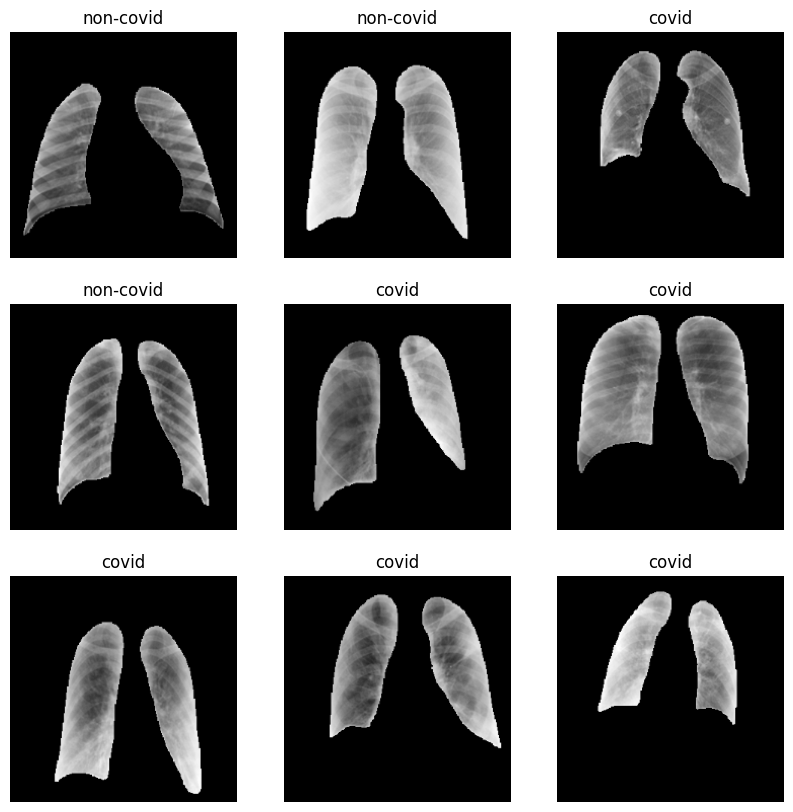

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds_masked.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().reshape(224,224).astype("uint8"), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
images = train_ds_masked.take(1)
for image, label in images:
  print('Label:', label.numpy())
  print('Shape of the batch : {}'.format(image.numpy().shape))
  print('Dimension of Image : {}'.format(image.ndim))
  print('Image Data Type : {}'.format(image.dtype))

Label: [1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1]
Shape of the batch : (32, 224, 224, 1)
Dimension of Image : 4
Image Data Type : <dtype: 'float32'>


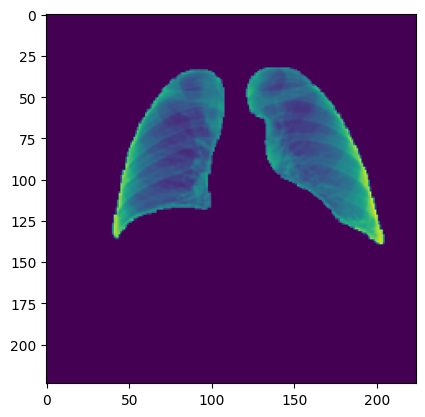

In [ ]:
plt.imshow(image[0, :, :, 0])
plt.show()

## Preprocessing

In [ ]:
dic_keys=list(dic.keys())
array_covid=np.zeros((1,4481))
for i in tqdm(range(len(dic_keys))):
  img = cv2.imread(dic[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
  pca = PCA(n_components=20)
  pca.fit(img)
  trans_img = pca.transform(img)
  array_covid=np.append(array_covid,np.concatenate((trans_img.flatten(),np.array([1])),axis=0).reshape(1,4481),axis=0)

100%|██████████| 3616/3616 [05:24<00:00, 11.14it/s]


In [ ]:
dic_no_covid_keys=list(dic_no_covid.keys())
array_no_covid=np.zeros((1,4481))
for i in tqdm(range(len(dic_no_covid_keys))):
  img = cv2.imread(dic_no_covid[i]) #you can use any image you want.
  if img is None:
        print(f"Error loading image at path: {img_path}")
        continue
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
  pca = PCA(n_components=20)
  pca.fit(img)
  trans_img = pca.transform(img)
  array_no_covid=np.append(array_no_covid,np.concatenate((trans_img.flatten(),np.array([0])),axis=0).reshape(1,4481),axis=0)

100%|██████████| 4192/4192 [06:57<00:00, 10.03it/s]


In [ ]:
data_array=np.concatenate((array_covid,array_no_covid),axis=0)
data_array.shape

(7810, 4481)

## Splitting data

In [ ]:
X_masked = data_array.T[:-1].T
Y_masked = data_array.T[-1].T

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train_masked, X_test_masked, y_train_masked, y_test_masked = tts(X_masked, Y_masked, train_size=0.7)

## Classification

### Simple models

**Kmeans**

In [ ]:
model1 = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10)
model1.fit(X_train_masked)
y_pred_kmeans = model1.predict(X_test_masked)

In [ ]:
m_acc_kmeans = accuracy_score(y_pred_kmeans, y_test_masked)
print(f"Accuracy : {(m_acc_kmeans*100):.2f}%")
print()
print(classification_report(y_pred_kmeans, y_test_masked))

Accuracy : 46.27%

              precision    recall  f1-score   support

           0       0.19      0.49      0.27       473
           1       0.78      0.45      0.57      1870

    accuracy                           0.46      2343
   macro avg       0.48      0.47      0.42      2343
weighted avg       0.66      0.46      0.51      2343



**Decision Tree**

In [ ]:
model2 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3)
model2.fit(X_train_masked, y_train_masked)
y_pred_dtc = model2.predict(X_test_masked)

In [ ]:
m_acc_dtc = accuracy_score(y_pred_dtc, y_test_masked)
print(f"Accuracy : {(m_acc_dtc*100):.2f}%")
print()
print(classification_report(y_pred_dtc, y_test_masked))

Accuracy : 66.88%

              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71      1434
         1.0       0.56      0.67      0.61       909

    accuracy                           0.67      2343
   macro avg       0.66      0.67      0.66      2343
weighted avg       0.68      0.67      0.67      2343



In [ ]:
parameters = {'max_depth':[2, 4, 8], 'min_samples_leaf':[2, 4, 7]}
dtc = DecisionTreeClassifier()
model3 = GridSearchCV(dtc, parameters)
model3.fit(X_train_masked, y_train_masked)
y_pred_3 = model3.predict(X_test_masked)

In [ ]:
model3.best_params_

{'max_depth': 4, 'min_samples_leaf': 2}

In [ ]:
m_acc_3 = accuracy_score(y_pred_3, y_test_masked)
print(f"Accuracy : {(acc_3*100):.2f}%")
print()
print(classification_report(y_pred_3, y_test_masked))

Accuracy : 69.70%

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70      1226
         1.0       0.67      0.66      0.66      1117

    accuracy                           0.68      2343
   macro avg       0.68      0.68      0.68      2343
weighted avg       0.68      0.68      0.68      2343



**Random Forest**

In [ ]:
model4 = RandomForestClassifier(n_estimators=200, max_depth=8, min_samples_leaf=2, min_samples_split=3)
model4.fit(X_train_masked, y_train_masked)
y_pred_rfc = model4.predict(X_test_masked)

In [ ]:
m_acc_rfc = accuracy_score(y_pred_rfc, y_test_masked)
print(f"Accuracy : {(m_acc_rfc*100):.2f}%")
print()
print(classification_report(y_pred_rfc, y_test_masked))

Accuracy : 73.62%

              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      1296
         1.0       0.70      0.72      0.71      1047

    accuracy                           0.74      2343
   macro avg       0.73      0.74      0.73      2343
weighted avg       0.74      0.74      0.74      2343



In [ ]:
y_pred_rfc_proba = model4.predict_proba(X_test_masked)

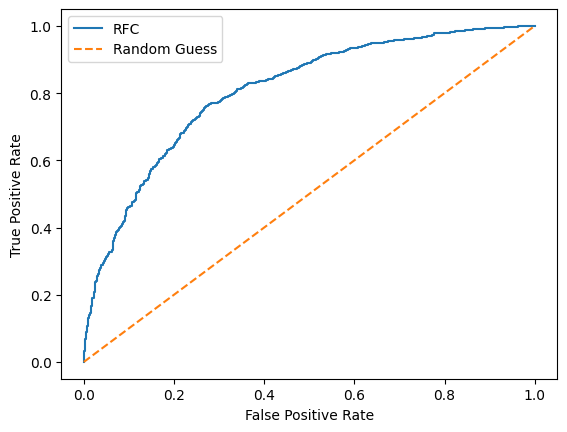

In [ ]:
probs = y_pred_rfc_proba[:, 1]
fpr, tpr, _ = roc_curve(y_test_masked, probs)

pyplot.plot(fpr, tpr, label='RFC')
pyplot.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [ ]:
parameters = {'max_depth':[2, 4, 8], 'min_samples_leaf':[2, 4, 7]}
rfc = RandomForestClassifier()
model5 = GridSearchCV(rfc, parameters)
model5.fit(X_train_masked, y_train_masked)
y_pred_5 = model5.predict(X_test_masked)

In [ ]:
model5.best_score_

0.7362369139831169

In [ ]:
m_acc_5 = accuracy_score(y_pred_5, y_test_masked)
print(f"Accuracy : {(m_acc_5*100):.2f}%")
print()
print(classification_report(y_pred_5, y_test))

Accuracy : 73.79%

              precision    recall  f1-score   support

         0.0       0.55      0.55      0.55      1302
         1.0       0.44      0.44      0.44      1041

    accuracy                           0.50      2343
   macro avg       0.49      0.49      0.49      2343
weighted avg       0.50      0.50      0.50      2343



**Logistic Regression**

In [ ]:
model6 = LogisticRegression()
model6.fit(X_train_masked, y_train_masked)
y_pred_lgr = model6.predict(X_test_masked)

In [ ]:
m_acc_lgr = accuracy_score(y_pred_lgr, y_test_masked)
print(f"Accuracy : {(m_acc_lgr*100):.2f}%")
print()
print(classification_report(y_pred_lgr, y_test_masked))

Accuracy : 57.19%

              precision    recall  f1-score   support

         0.0       0.59      0.60      0.60      1235
         1.0       0.55      0.54      0.54      1108

    accuracy                           0.57      2343
   macro avg       0.57      0.57      0.57      2343
weighted avg       0.57      0.57      0.57      2343



**SVM**

In [ ]:
model7 = make_pipeline(StandardScaler(), SVC())
model7.fit(X_train_masked, y_train_masked)
y_pred_svm = model7.predict(X_test_masked)

In [ ]:
m_acc_svm = accuracy_score(y_pred_svm, y_test_masked)
print(f"Accuracy : {(m_acc_svm*100):.2f}%")
print()
print(classification_report(y_pred_svm, y_test_masked))

Accuracy : 67.82%

              precision    recall  f1-score   support

         0.0       0.75      0.68      0.71      1374
         1.0       0.60      0.67      0.63       969

    accuracy                           0.68      2343
   macro avg       0.67      0.68      0.67      2343
weighted avg       0.69      0.68      0.68      2343



**XGBoost**

In [ ]:
model8 = XGBClassifier(n_estimators=200)
model8.fit(X_train_masked, y_train_masked)
y_pred_xgb = model8.predict(X_test_masked)

In [ ]:
m_acc_xgb = accuracy_score(y_pred_xgb, y_test_masked)
print(f"Accuracy : {(m_acc_xgb*100):.2f}%")
print()
print(classification_report(y_pred_xgb, y_test_masked))

Accuracy : 73.28%

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1282
           1       0.70      0.72      0.71      1061

    accuracy                           0.73      2343
   macro avg       0.73      0.73      0.73      2343
weighted avg       0.73      0.73      0.73      2343



**LightGBM**

In [ ]:
model9 = LGBMClassifier(n_estimators=200)
model9.fit(X_train_masked, y_train_masked)
y_pred_lgbm = model9.predict(X_test_masked)

In [ ]:
m_acc_lgbm = accuracy_score(y_pred_lgbm, y_test_masked)
print(f"Accuracy : {(m_acc_lgbm*100):.2f}%")
print()
print(classification_report(y_pred_lgbm, y_test_masked))

Accuracy : 74.99%

              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      1294
         1.0       0.71      0.74      0.73      1049

    accuracy                           0.75      2343
   macro avg       0.75      0.75      0.75      2343
weighted avg       0.75      0.75      0.75      2343



Text(0, 0.5, 'Accuracy')

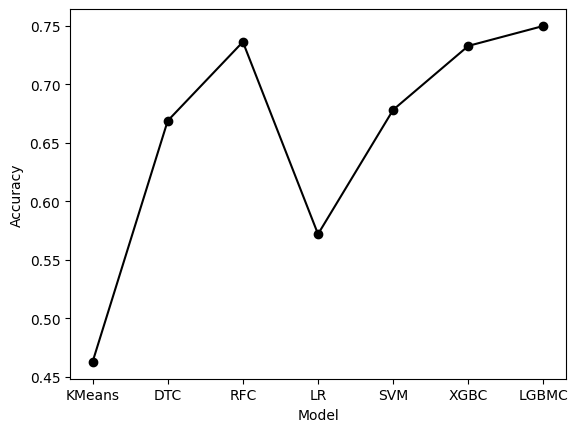

In [ ]:
plt.plot(['KMeans', 'DTC', 'RFC', 'LR', 'SVM', 'XGBC','LGBMC'], [m_acc_kmeans, m_acc_dtc, m_acc_rfc, m_acc_lgr, m_acc_svm, m_acc_xgb, m_acc_lgbm], marker='o', color='black')
plt.xlabel('Model')
plt.ylabel('Accuracy')

### Deep Learning models

**Simple CNN**

In [ ]:
model = tf.keras.Sequential([
  layers.Conv2D(32, 3, activation='relu', input_shape=(224, 224, 1)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds_masked,
  validation_data=val_ds_masked,
  epochs=10)

Epoch 1/10
196/196 [==============================] - 18s 81ms/step - loss: 2.2459 - accuracy: 0.7061 - val_loss: 0.5173 - val_accuracy: 0.7277
Epoch 2/10
196/196 [==============================] - 13s 67ms/step - loss: 0.4246 - accuracy: 0.8076 - val_loss: 0.4678 - val_accuracy: 0.7803
Epoch 3/10
196/196 [==============================] - 14s 68ms/step - loss: 0.3319 - accuracy: 0.8505 - val_loss: 0.4701 - val_accuracy: 0.7764
Epoch 4/10
196/196 [==============================] - 13s 67ms/step - loss: 0.2479 - accuracy: 0.8971 - val_loss: 0.5426 - val_accuracy: 0.7662
Epoch 5/10
196/196 [==============================] - 13s 67ms/step - loss: 0.1730 - accuracy: 0.9283 - val_loss: 0.6772 - val_accuracy: 0.7521
Epoch 6/10
196/196 [==============================] - 13s 67ms/step - loss: 0.1161 - accuracy: 0.9536 - val_loss: 0.8823 - val_accuracy: 0.7598
Epoch 7/10
196/196 [==============================] - 13s 67ms/step - loss: 0.0811 - accuracy: 0.9693 - val_loss: 0.9433 - val_accuracy:

In [ ]:
m_hist_cnn = pd.DataFrame(history.history)
m_hist_cnn['epoch'] = history.epoch
m_hist_cnn

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.245930,0.706099,0.517256,0.727739,0
1,0.424594,0.807588,0.467835,0.780269,1
2,0.331906,0.850488,0.470081,0.776425,2
3,0.247881,0.897071,0.542583,0.766176,3
4,0.173036,0.928286,0.677170,0.752082,4
5,0.116137,0.953578,0.882312,0.759769,5
6,0.081085,0.969265,0.943301,0.764254,6
7,0.072769,0.971346,1.267491,0.758488,7
8,0.059438,0.979190,1.421122,0.762972,8
9,0.049765,0.981431,1.411032,0.754644,9


Text(0.5, 1.0, 'Accuracy variation with epochs')

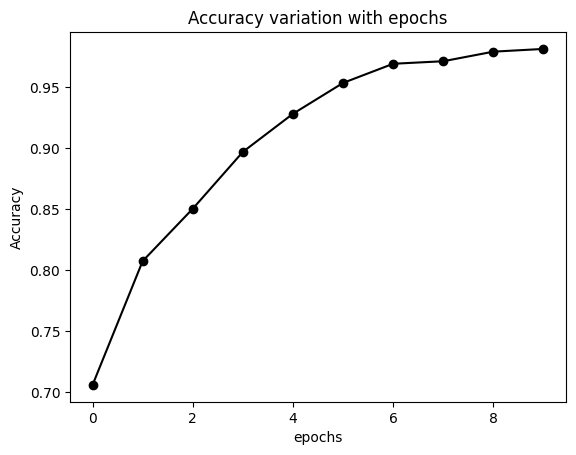

In [ ]:
plt.plot(m_hist_cnn['accuracy'], marker='o', color='black')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy variation with epochs')

**MobileNet**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.applications.mobilenet import MobileNet, preprocess_input
train_ds_masked_rgb_new = train_ds_masked_rgb.map(lambda x, y: (preprocess_input(x), y))

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds_masked_rgb_new, epochs=10, validation_data=val_ds_masked_rgb)

Epoch 1/10
196/196 [==============================] - 42s 128ms/step - loss: 0.3552 - accuracy: 0.8679 - val_loss: 0.2506 - val_accuracy: 0.9045
Epoch 2/10
196/196 [==============================] - 25s 126ms/step - loss: 0.1891 - accuracy: 0.9248 - val_loss: 0.2665 - val_accuracy: 0.9052
Epoch 3/10
196/196 [==============================] - 30s 150ms/step - loss: 0.1236 - accuracy: 0.9547 - val_loss: 0.5033 - val_accuracy: 0.8309
Epoch 4/10
196/196 [==============================] - 25s 126ms/step - loss: 0.1204 - accuracy: 0.9552 - val_loss: 0.1828 - val_accuracy: 0.9372
Epoch 5/10
196/196 [==============================] - 26s 132ms/step - loss: 0.0875 - accuracy: 0.9654 - val_loss: 0.4713 - val_accuracy: 0.8802
Epoch 6/10
196/196 [==============================] - 26s 130ms/step - loss: 0.0756 - accuracy: 0.9707 - val_loss: 1.0324 - val_accuracy: 0.8065
Epoch 7/10
196/196 [==============================] - 27s 136ms/step - loss: 0.0590 - accuracy: 0.9768 - val_loss: 0.7237 - val_ac

In [ ]:
m_hist_mn = pd.DataFrame(history.history)
m_hist_mn['epoch'] = history.epoch
m_hist_mn

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.355190,0.867937,0.250585,0.904548,0
1,0.189052,0.924764,0.266496,0.905189,1
2,0.123556,0.954698,0.503320,0.830878,2
3,0.120384,0.955178,0.182809,0.937220,3
4,0.087471,0.965423,0.471318,0.880205,4
5,0.075591,0.970706,1.032431,0.806534,5
6,0.059016,0.976789,0.723722,0.771941,6
7,0.055293,0.979190,0.175201,0.935938,7
8,0.087977,0.968625,0.256818,0.909673,8
9,0.040326,0.985753,1.443340,0.745676,9


Text(0.5, 1.0, 'Accuracy variation with epochs')

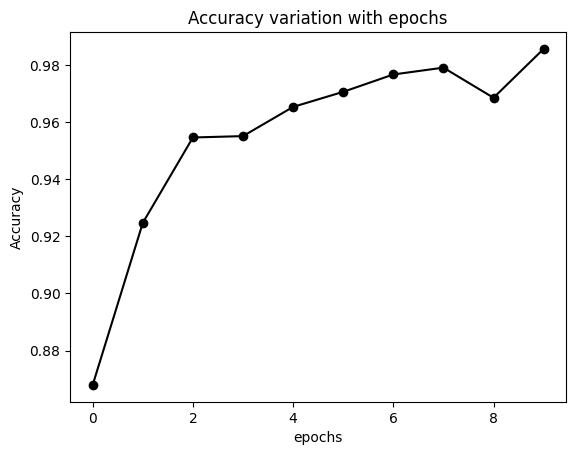

In [ ]:
plt.plot(m_hist_mn['accuracy'], marker='o', color='black')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy variation with epochs')

**EffiecientNet**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.applications.efficientnet import EfficientNetB0, preprocess_input
train_ds_masked_rgb_new = train_ds_masked_rgb.map(lambda x, y: (preprocess_input(x), y))

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds_masked_rgb_new, epochs=10, validation_data=val_ds_masked_rgb)

Epoch 1/10
196/196 [==============================] - 96s 282ms/step - loss: 0.2883 - accuracy: 0.8751 - val_loss: 0.7578 - val_accuracy: 0.7739
Epoch 2/10
196/196 [==============================] - 56s 284ms/step - loss: 0.1574 - accuracy: 0.9405 - val_loss: 0.3056 - val_accuracy: 0.8757
Epoch 3/10
196/196 [==============================] - 55s 280ms/step - loss: 0.1137 - accuracy: 0.9597 - val_loss: 0.5607 - val_accuracy: 0.8258
Epoch 4/10
196/196 [==============================] - 56s 282ms/step - loss: 0.0911 - accuracy: 0.9657 - val_loss: 0.1860 - val_accuracy: 0.9379
Epoch 5/10
196/196 [==============================] - 55s 280ms/step - loss: 0.0802 - accuracy: 0.9699 - val_loss: 0.1829 - val_accuracy: 0.9295
Epoch 6/10
196/196 [==============================] - 56s 283ms/step - loss: 0.0524 - accuracy: 0.9805 - val_loss: 0.1938 - val_accuracy: 0.9488
Epoch 7/10
196/196 [==============================] - 57s 287ms/step - loss: 0.0560 - accuracy: 0.9774 - val_loss: 0.1398 - val_ac

In [ ]:
m_hist_en = pd.DataFrame(history.history)
m_hist_en['epoch'] = history.epoch
m_hist_en

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.288329,0.875140,0.757823,0.773863,0
1,0.157405,0.940451,0.305556,0.875721,1
2,0.113745,0.959661,0.560741,0.825753,2
3,0.091146,0.965744,0.186014,0.937860,3
4,0.080224,0.969906,0.182850,0.929532,4
5,0.052379,0.980471,0.193798,0.948751,5
6,0.056016,0.977429,0.139804,0.960922,6
7,0.036224,0.987194,0.189847,0.937860,7
8,0.029290,0.989915,0.691079,0.897502,8
9,0.031259,0.989595,0.133080,0.955798,9


Text(0.5, 1.0, 'Accuracy variation with epochs')

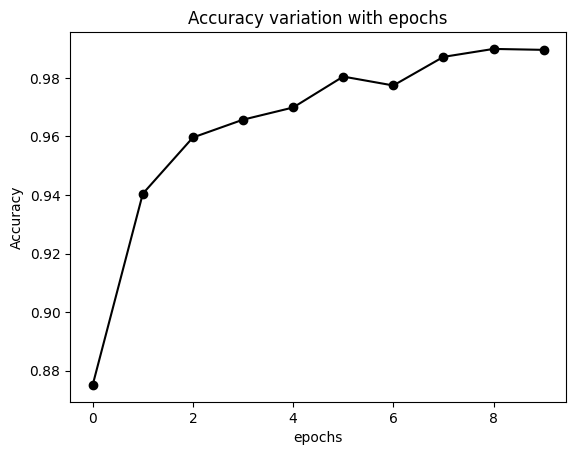

In [ ]:
plt.plot(m_hist_en['accuracy'], marker='o', color='black')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy variation with epochs')

# Comparison between masked and unmasked

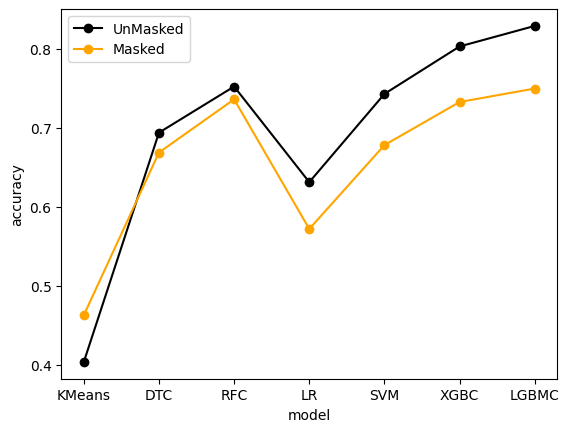

In [ ]:
plt.plot(['KMeans', 'DTC', 'RFC', 'LR', 'SVM', 'XGBC','LGBMC'], [acc_kmeans, acc_dtc, acc_rfc, acc_lgr, acc_svm, acc_xgb, acc_lgbm], marker='o', color='black')
plt.plot(['KMeans', 'DTC', 'RFC', 'LR', 'SVM', 'XGBC','LGBMC'], [m_acc_kmeans, m_acc_dtc, m_acc_rfc, m_acc_lgr, m_acc_svm, m_acc_xgb, m_acc_lgbm], marker='o', color='orange')
plt.xlabel('model')
plt.ylabel('accuracy')
plt.legend(['UnMasked','Masked'])

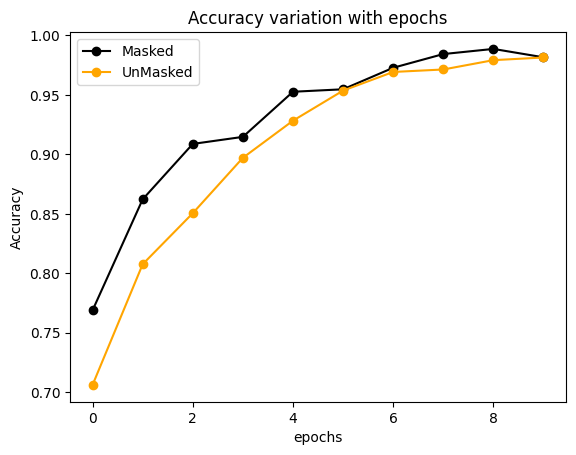

In [ ]:
plt.plot(hist_cnn['accuracy'], marker='o', color='black')
plt.plot(m_hist_cnn['accuracy'], marker='o', color='orange')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy variation with epochs')
plt.legend(['Masked','UnMasked'])

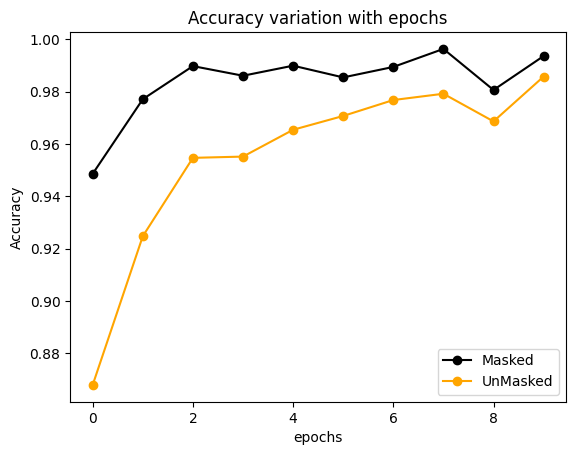

In [ ]:
plt.plot(hist_mn['accuracy'], marker='o', color='black')
plt.plot(m_hist_mn['accuracy'], marker='o', color='orange')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy variation with epochs')
plt.legend(['Masked','UnMasked'])

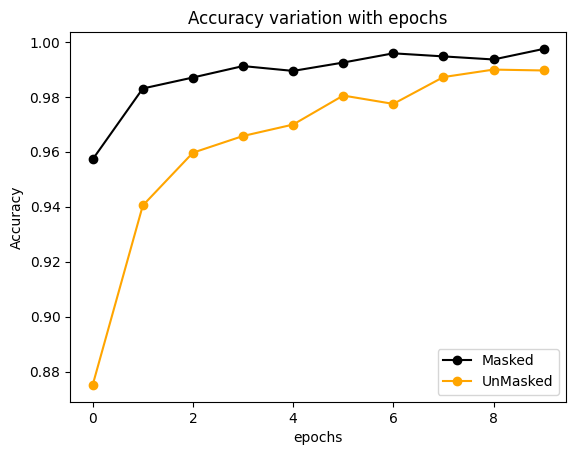

In [ ]:
plt.plot(hist_en['accuracy'], marker='o', color='black')
plt.plot(m_hist_en['accuracy'], marker='o', color='orange')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy variation with epochs')
plt.legend(['Masked','UnMasked'])